# 2차 과제

## 16조
2019112127 박세호, 2020112167 민장규, 2020112089 최지안

## 데이터 소개
사용한 dataset : https://www.kaggle.com/datasets/kukuroo3/used-car-price-dataset-competition-format

### Feature 소개
- carID : 고유 ID
- brand : 회사 브랜드
- model : 모델명
- year : 출시년도
- transmission : 변속기
- mileage : 주행거리
- fuelType : 연료 유형
- tax : 세금
- mpg : Miles Per Gallon
- engineSize : 엔진 배기량
- price : 가격

## 개요

### 데이터 전처리

- 중복값 처리
- 결측치 처리
- 범주형 변수 원핫 인코딩

### Linear Regression

### Polynomial Regression

### Using regularized methods for regression
- Ridge
- Lasso

# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split

import seaborn as sns


In [2]:
data = pd.read_csv('used_car_price_dataset.csv')

In [3]:
data.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145,39.8,2.2,31995
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125,60.1,2.0,7700
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145,29.1,2.9,58990
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30,57.6,2.0,12999
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145,47.1,1.0,16990


In [4]:
data.describe()

,carID,year,mileage,tax,mpg,engineSize,price
count,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000
mean,15832.446169,2016.737903,24956.286895,152.332661,50.370766,2.124375,23469.943750
std,2206.717006,2.884035,24443.333662,82.403844,35.746505,0.789368,16406.714563
min,12002.000000,1997.000000,1.000000,0.000000,2.800000,0.000000,450.000000
25%,13929.250000,2016.000000,5641.250000,145.000000,38.700000,1.600000,12000.000000
50%,15840.000000,2017.000000,19000.000000,145.000000,47.100000,2.000000,18999.000000
75%,17765.750000,2019.000000,36702.000000,150.000000,54.300000,2.800000,30335.750000
max,19629.000000,2020.000000,259000.000000,580.000000,470.800000,6.600000,145000.000000


## 중복값 처리

In [5]:
print("중복된 data 개수 :", len(data[data.duplicated()]))

중복된 data 개수 : 0


## 결측치 처리

In [6]:
data.isnull().sum()

carID           0
brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64

In [7]:
#carID는 index로 지정
data = data.set_index('carID')

## 범주형 변수 이진화

In [8]:
categorical_features = ['brand', 'model', 'transmission','fuelType']

for col in categorical_features:
    print(data[col].value_counts())
    print()

merc        790
vw          768
ford        766
bmw         638
hyundi      511
toyota      446
skoda       425
audi        343
vauxhall    273
Name: brand, dtype: int64

 Arteon         167
 Grand C-MAX    164
 Scirocco       163
 Prius          154
 Santa Fe       150
               ... 
 Eos              5
 Z3               5
 Getz             4
 CLK              4
 IQ               2
Name: model, Length: 90, dtype: int64

Manual       1948
Automatic    1660
Semi-Auto    1351
Other           1
Name: transmission, dtype: int64

Diesel      2989
Petrol      1754
Hybrid       189
Other         26
Electric       2
Name: fuelType, dtype: int64



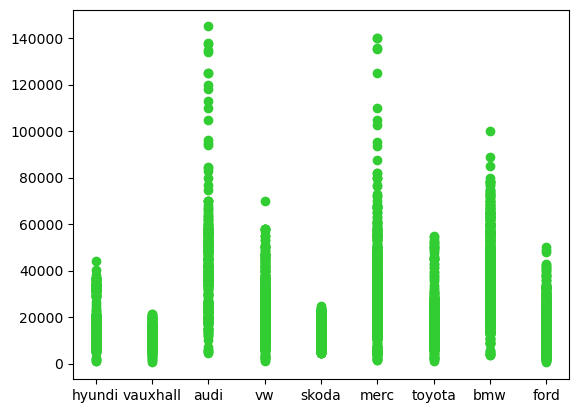

In [9]:
plt.scatter(data['brand'], data['price'], color='limegreen')
plt.show()

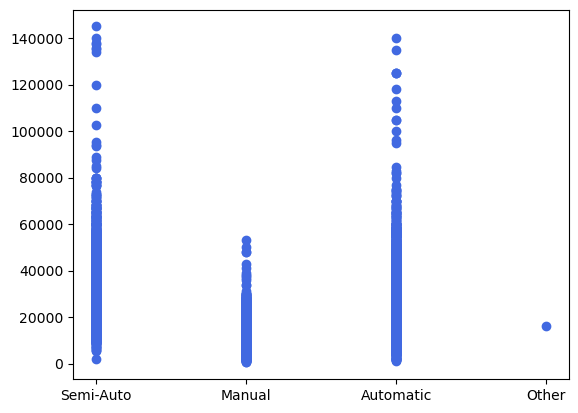

In [10]:
plt.scatter(data['transmission'], data['price'], color='royalblue')
plt.show()

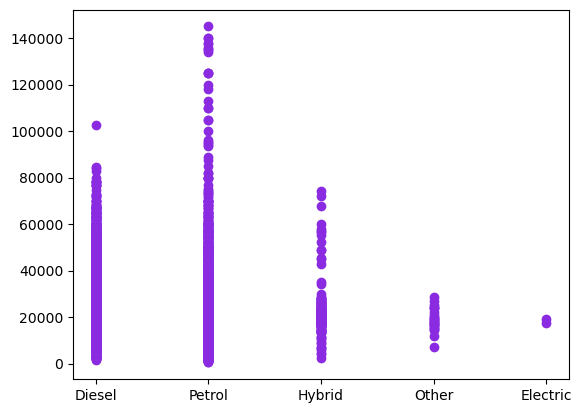

In [11]:
plt.scatter(data['fuelType'], data['price'], color='blueviolet')
plt.show()

In [12]:
# 모델명을 제외한 범주형 변수에 대해 원핫 인코딩 진행
categorical_features = ['brand', 'transmission', 'fuelType']

for col in categorical_features:
    data = pd.concat([data, pd.get_dummies(data[col])], axis=1)

data.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price,...,vw,Automatic,Manual,Other,Semi-Auto,Diesel,Electric,Hybrid,Other,Petrol
carID,,,,,,,,,,,,,,,,,,,,,
13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145,39.8,2.2,31995,...,0,0,0,0,1,1,0,0,0,0
17314,vauxhall,GTC,2015,Manual,47870,Diesel,125,60.1,2.0,7700,...,0,0,1,0,0,1,0,0,0,0
12342,audi,RS4,2019,Automatic,5151,Petrol,145,29.1,2.9,58990,...,0,1,0,0,0,0,0,0,0,1
13426,vw,Scirocco,2016,Automatic,20423,Diesel,30,57.6,2.0,12999,...,1,1,0,0,0,1,0,0,0,0
16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145,47.1,1.0,16990,...,0,0,0,0,1,0,0,0,0,1


In [13]:
#categorical feature 삭제
categorical_features = ['brand', 'model','transmission', 'fuelType']

data.drop(categorical_features, axis=1, inplace = True)

<Axes: >

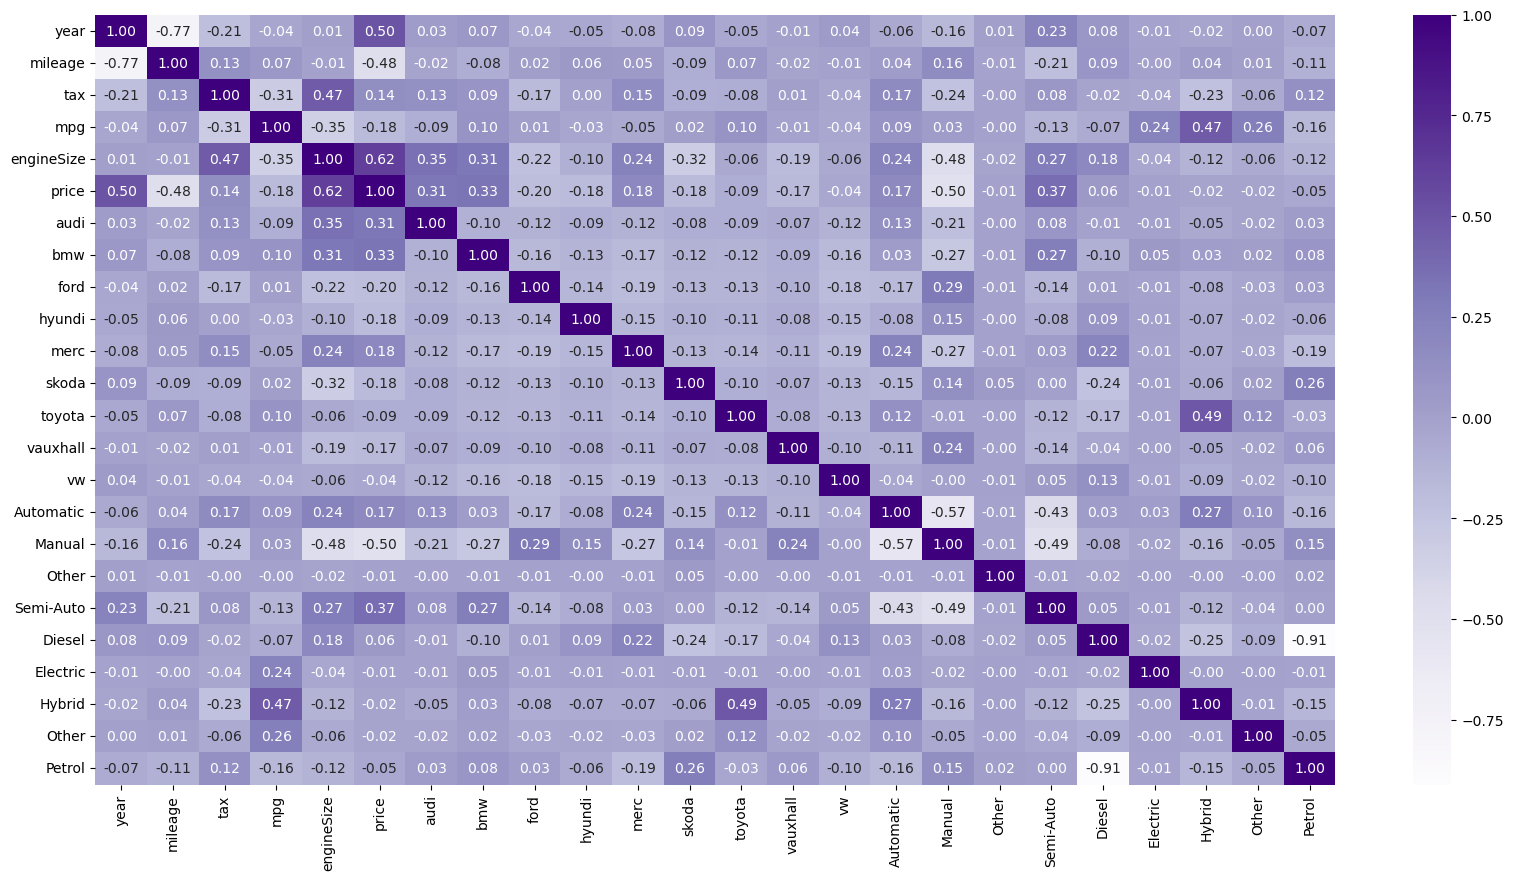

In [14]:
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, fmt=".2f" ,cmap='Purples')

In [15]:
# price와 상관관계가 높은 변수 분석
p_corr = corr.loc['price']
p_corr = p_corr[abs(p_corr)>0.4].sort_values(ascending=False)
print(p_corr)

price         1.000000
engineSize    0.624899
year          0.501296
mileage      -0.478705
Manual       -0.502716
Name: price, dtype: float64


# Linear Regression
- car price와 다른 feature 사이의 관계를 알아보기 위해 linear regression을 사용한다.

- 데이터셋 내 feature들과 car price 사이의 MSE, R2값을 조사한다.

- continuous한 value를 갖는 feature 중에서 어떤 feature가 car price를 예측하는데 가장 정확할 지 확인한다.

- `r2 값이 가장 높게 나오는 경우의 linear regression 그래프가 가장 예측하기 적합할 것이다.`

- 정규화 이전과 이후 r2 score의 차이를 비교한다.

- `데이터를 정규화 해주었을 때 r2 score가 보다 향상되었는지 확인한다.`

## Linear Regression

- 데이터셋 내 feature들과 car price 사이의 MSE, R2값을 조사한다.

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [17]:
X= data.drop(["price"],axis =1)
y= data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
print(f'train data 개수 : {len(X_train)}, test data 개수 :{len(X_test)} ')

train data 개수 : 3968, test data 개수 :992 


In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
model.coef_

array([ 1.76819487e+03, -1.28440354e-01, -7.69714915e+00, -1.76480682e+01,
        9.18974505e+03,  8.32520705e+03,  5.71517045e+03, -2.06860200e+03,
       -3.83000825e+03,  4.65232517e+03, -4.41820975e+03, -3.41435040e+03,
       -4.46425782e+03, -4.97274443e+02,  1.53370120e+02, -1.75449093e+03,
       -2.94030327e+02,  1.89515114e+03, -5.40228511e+03,  4.07748953e+03,
        2.15358967e+03,  2.68306885e+03, -3.51186295e+03])

In [20]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [21]:
print('MSE of trainset: %.2f' % (mean_squared_error(y_train_pred , y_train)))
print('MSE of testset: %.2f' % (mean_squared_error(y_train_pred , y_train)))

MSE of trainset: 73507238.66
MSE of testset: 73507238.66


In [22]:
print('r2 of trainset: %.3f' % (r2_score(y_train_pred , y_train)))
print('r2 of testset: %.3f' % (r2_score(y_test_pred , y_test)))

r2 of trainset: 0.614
r2 of testset: 0.573


In [23]:
print("Train Adjusted r2: %.3f" % (1 - (1-r2_score(y_train, y_train_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))
print("Test Adjusted r2: %.3f" % (1 - (1-r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)))

Train Adjusted r2: 0.720
Test Adjusted r2: 0.704


# Polynomial Regression

## Plot Linear Regression

- continuous한 value를 갖는 feature 중에서 어떤 feature가 car price를 예측하는데 가장 정확할 지 확인한다.

- 정규화 이전과 이후 r2 score의 차이를 비교한다.

### without remove outlier

In [24]:
def plot_regression(xval, data) :
    X = data[[xval]].values
    y = data['price'].values

    regr = LinearRegression()

    quadratic = PolynomialFeatures(degree=2)
    cubic = PolynomialFeatures(degree=3)
    X_quad = quadratic.fit_transform(X)
    X_cubic = cubic.fit_transform(X)

    X_fit = np.arange(X.min(), X.max(), 0.1)[:, np.newaxis]

    regr = regr.fit(X, y)
    y_lin_fit = regr.predict(X_fit)
    linear_r2 = r2_score(y, regr.predict(X))

    regr = regr.fit(X_quad, y)
    y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
    quadratic_r2 = r2_score(y, regr.predict(X_quad))

    regr = regr.fit(X_cubic, y)
    y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
    cubic_r2 = r2_score(y, regr.predict(X_cubic))

    plt.scatter(X, y, label='training points', color='lightgray')

    plt.plot(X_fit, y_lin_fit, 
            label='linear (d=1), $R^2=%.2f$' % linear_r2, 
            color='blue', 
            lw=2, 
            linestyle=':')

    plt.plot(X_fit, y_quad_fit, 
            label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
            color='red', 
            lw=2,
            linestyle='-')

    plt.plot(X_fit, y_cubic_fit, 
            label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
            color='green', 
            lw=2, 
            linestyle='--')

    plt.xlabel(col)
    plt.ylabel('Car Price ($)')
    plt.legend(loc='upper right')

    plt.show()

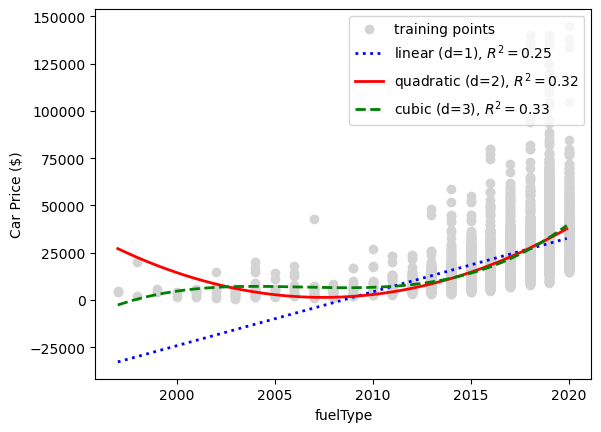

In [25]:
plot_regression('year', data)

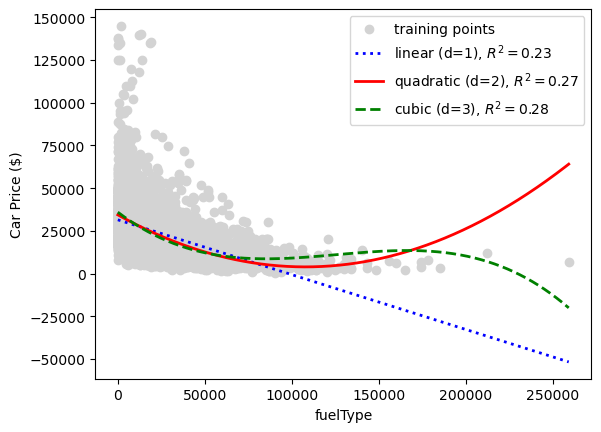

In [26]:
plot_regression('mileage', data)

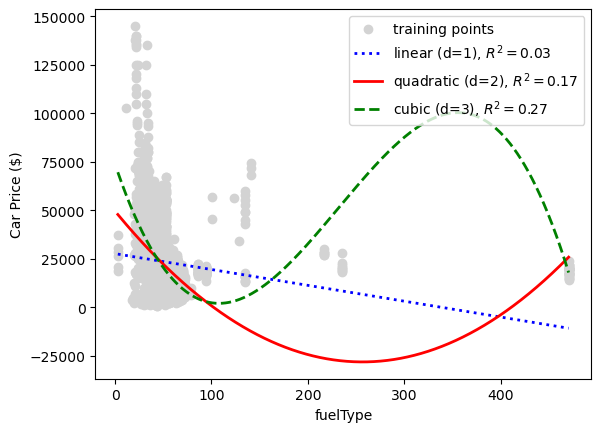

In [27]:
plot_regression('mpg', data)

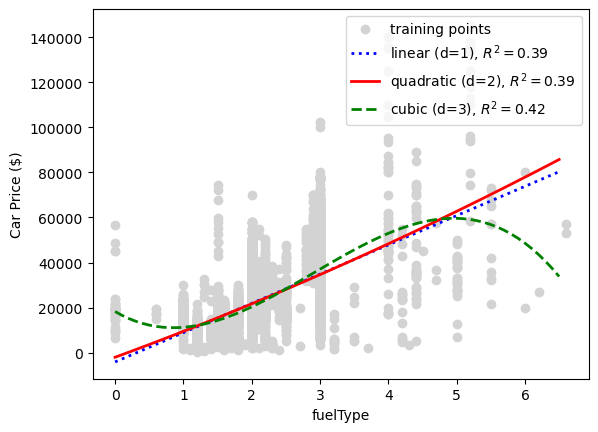

In [28]:
plot_regression('engineSize', data)

### 이상치 처리

In [29]:
def treatment_outlier(col, data) :
    # IQR 계산
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 제거
    data = data[~((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR)))]
    return data

In [30]:
data_preprocessing = data

In [31]:
col_preprocessing = ['year', 'mileage', 'mpg', 'engineSize']
for col in col_preprocessing :
    data_preprocessing = treatment_outlier(col, data_preprocessing)

### with remove outlier

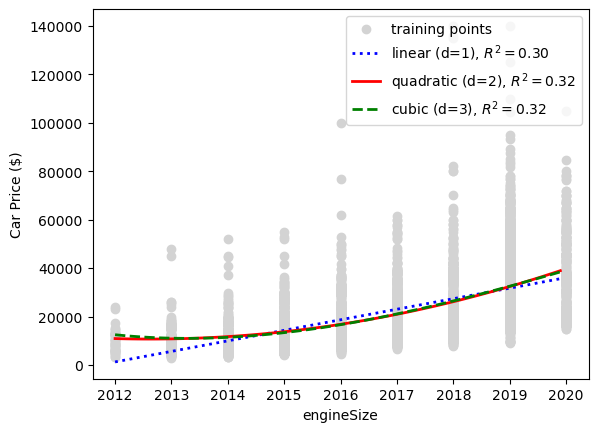

In [32]:
plot_regression('year', data_preprocessing)

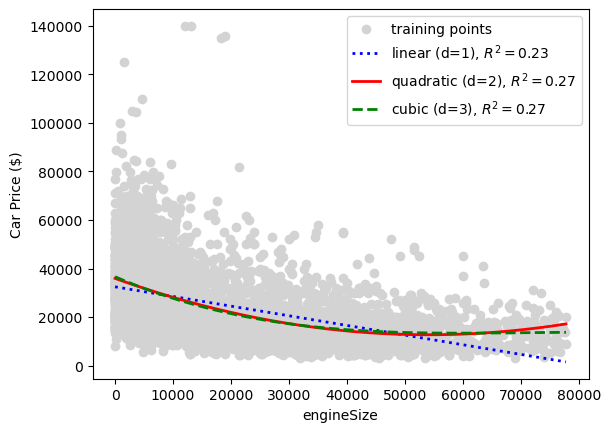

In [33]:
plot_regression('mileage', data_preprocessing)

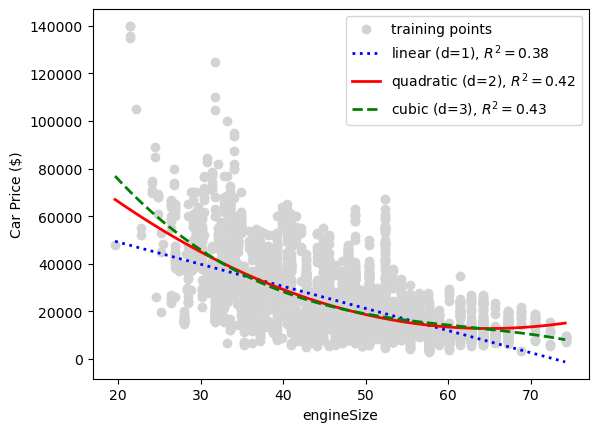

In [34]:
plot_regression('mpg', data_preprocessing)

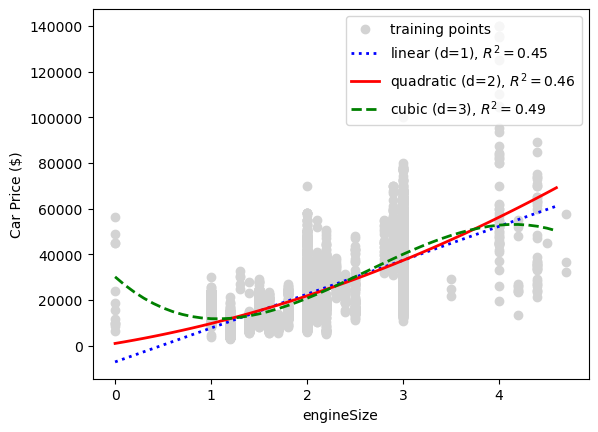

In [35]:
plot_regression('engineSize', data_preprocessing)

## Conclusion

- 다양한 continuous value와 car price와의 관계를 선형회귀, 다형회귀를 통해 알아 보았음.

- mpg와 engineSize의 경우 정규화 이후 r2 score가 보다 향상된 것을 확인할 수 있음.

- 특히 mpg의 경우 정규화 이후 r2 score가 크게 향상됨.

- 정규화 이후 mpg와 engineSize를 통해 차값을 예측하는 모델이 r2 score가 가장 높이 나왔음.

# Using regularized methods for regression

## Ridge

In [52]:
# Ridge
alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:

    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)

    # 예측
    y_train_pred = ridge_reg.predict(X_train)
    y_test_pred = ridge_reg.predict(X_test)

    # MSE 계산
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # R-squared 계산
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # 결과 출력
    print(f"alpha: {alpha}")
    print(f"Train MSE: {train_mse}")
    print(f"Test MSE: {test_mse}")
    print(f"Train R2: {train_r2}")
    print(f"Test R2: {test_r2}")
    print()

alpha: 0.0001
Train MSE: 73507238.66316935
Test MSE: 84004898.75369996
Train R2: 0.7212550281523895
Test R2: 0.7105336615507922

alpha: 0.001
Train MSE: 73507238.6683471
Test MSE: 84004926.61961405
Train R2: 0.721255028132755
Test R2: 0.7105335655296764

alpha: 0.01
Train MSE: 73507239.17926742
Test MSE: 84005203.00653157
Train R2: 0.7212550261953068
Test R2: 0.7105326131482058

alpha: 0.1
Train MSE: 73507284.16908976
Test MSE: 84007747.79918988
Train R2: 0.7212548555905203
Test R2: 0.7105238442332515

alpha: 1
Train MSE: 73509202.73093492
Test MSE: 84018645.49293752
Train R2: 0.7212475802598557
Test R2: 0.7104862926671707

alpha: 10
Train MSE: 73552596.34034829
Test MSE: 84006698.21788149
Train R2: 0.7210830284326578
Test R2: 0.7105274609087402

alpha: 100
Train MSE: 74619973.94177723
Test MSE: 85251666.24897547
Train R2: 0.7170354523725038
Test R2: 0.7062375165984243



C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.18429e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


## Lasso

In [54]:
# Lasso
alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, y_train)

    # 예측
    y_train_pred = lasso_reg.predict(X_train)
    y_test_pred = lasso_reg.predict(X_test)

    # MSE 계산
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # R-squared 계산
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # 결과 출력
    print(f"alpha: {alpha}")
    print(f"Train MSE: {train_mse}")
    print(f"Test MSE: {test_mse}")
    print(f"Train R2: {train_r2}")
    print(f"Test R2: {test_r2}")
    print()

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.428e+10, tolerance: 1.046e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.428e+10, tolerance: 1.046e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.429e+10, tolerance: 

alpha: 0.0001
Train MSE: 73507238.6632098
Test MSE: 84004897.44858281
Train R2: 0.7212550281522361
Test R2: 0.710533666048

alpha: 0.001
Train MSE: 73507238.67240371
Test MSE: 84004913.6082284
Train R2: 0.7212550281173722
Test R2: 0.7105336103646588

alpha: 0.01
Train MSE: 73507239.59180114
Test MSE: 84005076.86334582
Train R2: 0.721255024630948
Test R2: 0.7105330478157863

alpha: 0.1
Train MSE: 73507331.1819041
Test MSE: 84006909.32156318
Train R2: 0.7212546773143962
Test R2: 0.7105267334819986

alpha: 1
Train MSE: 73510412.32837616
Test MSE: 84019033.06469667
Train R2: 0.7212429933754776
Test R2: 0.7104849571619838

alpha: 10
Train MSE: 73572475.14984152
Test MSE: 83894892.87049907
Train R2: 0.7210076464935001
Test R2: 0.7109127227804403

alpha: 100
Train MSE: 75264076.2038738
Test MSE: 85470819.58208333
Train R2: 0.7145929682011448
Test R2: 0.70548235215165



C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.430e+10, tolerance: 1.046e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.629e+10, tolerance: 1.046e+08
  model = cd_fast.enet_coordinate_descent(
